In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ogdf = pd.read_csv('airtable.csv')
Ogdf = Ogdf.drop(['Source','Date_Added','List_of_Employees_Laid_Off'], axis=1)
print(Ogdf.isna().sum())

Company             0
Location_HQ         0
Industry            0
Percentage        919
Date                0
Funds_Raised      272
Stage               0
Country             0
Laid_Off_Count    867
dtype: int64


In [3]:
df = Ogdf.dropna()

df.reset_index(inplace=True, drop=True)
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count
0,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0
1,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0
2,Chigari,Bengaluru,Media,0.20,2023-06-19,88.0,Unknown,India,48.0
3,Mojocare,Bengaluru,Healthcare,0.80,2023-06-17,24.0,Series A,India,170.0
4,CareRev,Los Angeles,Healthcare,0.33,2023-06-15,51.0,Series A,United States,100.0


In [4]:
sort_array = ['Unknown','Seed','Series A','Series B','Series C','Series D','Series E','Series F','Series G','Series H','Series I','Series J','Private Equity','Post-IPO','Subsidiary','Acquired']

def create_unique_dict(array):
    unique_dict = {}
    count = 0
    for x in array:
        unique_dict[x] = count
        count+=1
    return unique_dict

def create_id_arr(dataframe,columnName, dictionary):
    arr = []
    for value in dataframe[columnName]:
        arr.append(dictionary[value])
    return arr

In [5]:
stage_dict  = create_unique_dict(sort_array)
stage_arr = create_id_arr(df, 'Stage', stage_dict)
df['StageID'] = stage_arr

df['Country_ID'] = pd.factorize(df['Country'])[0]
df['Industry_ID'] = pd.factorize(df['Industry'])[0]
df['Location_HQ_ID'] = pd.factorize(df['Location_HQ'])[0]
df['Company_ID'] = pd.factorize(df['Company'])[0]
df

/var/folders/dx/t77c4r3s3p59bpx3_j8c9_pm0000gn/T/ipykernel_79532/796060641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StageID'] = stage_arr
/var/folders/dx/t77c4r3s3p59bpx3_j8c9_pm0000gn/T/ipykernel_79532/796060641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country_ID'] = pd.factorize(df['Country'])[0]
/var/folders/dx/t77c4r3s3p59bpx3_j8c9_pm0000gn/T/ipykernel_79532/796060641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,StageID,Country_ID,Industry_ID,Location_HQ_ID,Company_ID
0,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,4,0,0,0,0
1,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,13,1,1,1,1
2,Chigari,Bengaluru,Media,0.20,2023-06-19,88.0,Unknown,India,48.0,0,2,2,2,2
3,Mojocare,Bengaluru,Healthcare,0.80,2023-06-17,24.0,Series A,India,170.0,2,2,3,2,3
4,CareRev,Los Angeles,Healthcare,0.33,2023-06-15,51.0,Series A,United States,100.0,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,Inspirato,Denver,Travel,0.22,2020-03-16,79.0,Series C,United States,130.0,4,3,19,18,266
1239,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16.0,1,3,12,33,1030
1240,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0,0,3,1,3,1031
1241,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0,1,3,5,4,1032


In [6]:
df['Total_Employee'] = ''
for i in df.index:
    # print(df['Laid_Off_Count'][i]/df['Percentage'][i], df['Laid_Off_Count'][i], df['Percentage'][i])
    try:
        df['Total_Employee'][i] = int(round(df['Laid_Off_Count'][i]/df['Percentage'][i],0))
    except Exception:
        df['Total_Employee'][i] = None
        
df.dropna()

/var/folders/dx/t77c4r3s3p59bpx3_j8c9_pm0000gn/T/ipykernel_79532/3184725067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Employee'] = ''
/var/folders/dx/t77c4r3s3p59bpx3_j8c9_pm0000gn/T/ipykernel_79532/3184725067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Employee'][i] = int(round(df['Laid_Off_Count'][i]/df['Percentage'][i],0))
/var/folders/dx/t77c4r3s3p59bpx3_j8c9_pm0000gn/T/ipykernel_79532/3184725067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,StageID,Country_ID,Industry_ID,Location_HQ_ID,Company_ID,Total_Employee
0,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,4,0,0,0,0,95
1,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,13,1,1,1,1,9091
2,Chigari,Bengaluru,Media,0.20,2023-06-19,88.0,Unknown,India,48.0,0,2,2,2,2,240
3,Mojocare,Bengaluru,Healthcare,0.80,2023-06-17,24.0,Series A,India,170.0,2,2,3,2,3,212
4,CareRev,Los Angeles,Healthcare,0.33,2023-06-15,51.0,Series A,United States,100.0,2,3,3,3,4,303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,Inspirato,Denver,Travel,0.22,2020-03-16,79.0,Series C,United States,130.0,4,3,19,18,266,591
1239,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16.0,1,3,12,33,1030,16
1240,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0,0,3,1,3,1031,80
1241,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0,1,3,5,4,1032,8


In [7]:
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,StageID,Country_ID,Industry_ID,Location_HQ_ID,Company_ID,Total_Employee
0,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,4,0,0,0,0,95
1,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,13,1,1,1,1,9091
2,Chigari,Bengaluru,Media,0.20,2023-06-19,88.0,Unknown,India,48.0,0,2,2,2,2,240
3,Mojocare,Bengaluru,Healthcare,0.80,2023-06-17,24.0,Series A,India,170.0,2,2,3,2,3,212
4,CareRev,Los Angeles,Healthcare,0.33,2023-06-15,51.0,Series A,United States,100.0,2,3,3,3,4,303


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1243 non-null   object 
 1   Location_HQ     1243 non-null   object 
 2   Industry        1243 non-null   object 
 3   Percentage      1243 non-null   float64
 4   Date            1243 non-null   object 
 5   Funds_Raised    1243 non-null   float64
 6   Stage           1243 non-null   object 
 7   Country         1243 non-null   object 
 8   Laid_Off_Count  1243 non-null   float64
 9   StageID         1243 non-null   int64  
 10  Country_ID      1243 non-null   int64  
 11  Industry_ID     1243 non-null   int64  
 12  Location_HQ_ID  1243 non-null   int64  
 13  Company_ID      1243 non-null   int64  
 14  Total_Employee  1242 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 145.8+ KB


In [9]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count,StageID,Country_ID,Industry_ID,Location_HQ_ID,Company_ID
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,0.220730,797.220479,261.954143,6.267096,4.219630,11.002414,18.632341,482.767498
std,0.204786,5254.424013,852.480570,4.810191,4.468808,7.221980,25.474261,297.716462
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,62.000000,40.000000,3.000000,3.000000,4.000000,4.000000,223.500000
50%,0.150000,178.000000,81.000000,5.000000,3.000000,11.000000,5.000000,466.000000
75%,0.280000,480.500000,190.500000,13.000000,3.000000,16.000000,21.000000,735.500000
max,1.000000,121900.000000,12000.000000,15.000000,36.000000,28.000000,122.000000,1033.000000


<Axes: >

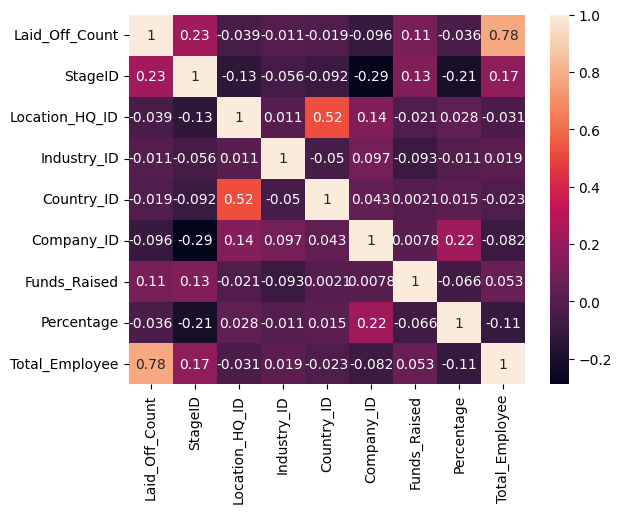

In [10]:
import matplotlib.pyplot as plt
corr_df = df[['Laid_Off_Count','StageID','Location_HQ_ID','Industry_ID','Country_ID','Company_ID', 'Funds_Raised', 'Percentage', 'Total_Employee']]
sns.heatmap(corr_df.corr(), annot=True)

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month_name()
# df['Quarters'] = df['Date'].dt.to_period('Q')

/var/folders/dx/t77c4r3s3p59bpx3_j8c9_pm0000gn/T/ipykernel_79532/3106501817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df.to_csv('updated.csv')

In [13]:
df['Country'].unique()

array(['Canada', 'Singapore', 'India', 'United States', 'Brazil',
       'Australia', 'Sweden', 'Germany', 'Israel', 'United Kingdom',
       'Chile', 'France', 'Spain', 'Ireland', 'New Zealand',
       'South Korea', 'Indonesia', 'Estonia', 'China', 'Argentina',
       'Nigeria', 'Kenya', 'Norway', 'Denmark', 'Thailand', 'Senegal',
       'Hong Kong', 'United Arab Emirates', 'Austria', 'Finland',
       'Malaysia', 'Mexico', 'Russia', 'Seychelles', 'Netherlands',
       'Switzerland', 'Portugal'], dtype=object)

# Visualizations

- Below is the Image of the visualization performed on the Data Using Tableau

![alt text](Dashboard.png)

# Interpretation from Visualization.

- January month has the highest layoff throughout the year. January is a time when many companies are doing restructures, reorganizations, and setting the direction for the year, which leads to layoff and also new recruiting.
- Retail Industry has the highest no of layoff people followed by Consumer and Transportation.
- Majority of the companies with Layoff are at Post-IPO stage.
- January 2023 has 6 times more layoff than Jan 2020 laid off count. Also over a period of time from Jan 2020 to July 2023 January months has the highest layoff's as much as 21%.
- United States has the highest number of people laidoff as compared to any other country. India is the second highest company to lay off people. Additionally, United Kingdom is has the highest percentage of people laid.